In [1]:
import pandas as pd

C:\Users\victo\AppData\Local\Temp\ipykernel_17008\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('snippet-datasets/homeprices.csv')
df.head()

town  area   price
0  monroe township  2600  550000
1  monroe township  3000  565000
2  monroe township  3200  610000
3  monroe township  3600  680000
4  monroe township  4000  725000

In [3]:
dummies = pd.get_dummies(df['town'], dtype = int)
dummies

monroe township  robinsville  west windsor
0                 1            0             0
1                 1            0             0
2                 1            0             0
3                 1            0             0
4                 1            0             0
5                 0            0             1
6                 0            0             1
7                 0            0             1
8                 0            0             1
9                 0            1             0
10                0            1             0
11                0            1             0
12                0            1             0

In [4]:
merged = pd.concat([df,dummies], axis='columns')
merged

town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680000                1            0             0
4   monroe township  4000  725000                1            0             0
5      west windsor  2600  585000                0            0             1
6      west windsor  2800  615000                0            0             1
7      west windsor  3300  650000                0            0             1
8      west windsor  3600  710000                0            0             1
9       robinsville  2600  575000                0            1             0
10      robinsville  2900  600000                0            1             0
11      robinsville  3100  620000                0            1             0
12      robinsville  3600  695000                0            1             0

In [5]:
final = merged.drop(['town', 'west windsor'], axis = 'columns')

In [6]:
final

area   price  monroe township  robinsville
0   2600  550000                1            0
1   3000  565000                1            0
2   3200  610000                1            0
3   3600  680000                1            0
4   4000  725000                1            0
5   2600  585000                0            0
6   2800  615000                0            0
7   3300  650000                0            0
8   3600  710000                0            0
9   2600  575000                0            1
10  2900  600000                0            1
11  3100  620000                0            1
12  3600  695000                0            1

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
X = final.drop('price', axis = 'columns')

In [9]:
y = final['price']

In [10]:
model.fit(X,y)

LinearRegression()

In [11]:
model.predict([[2800,0,1]])

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [12]:
model.score(X,y)

0.9573929037221872

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
dfle = df
dfle['town'] = le.fit_transform(dfle.town)
dfle


town  area   price
0      0  2600  550000
1      0  3000  565000
2      0  3200  610000
3      0  3600  680000
4      0  4000  725000
5      2  2600  585000
6      2  2800  615000
7      2  3300  650000
8      2  3600  710000
9      1  2600  575000
10     1  2900  600000
11     1  3100  620000
12     1  3600  695000

In [16]:
X = df[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [17]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

### Standard Deviation and Z-score recap

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('snippet-datasets/weight-height.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [4]:
# Drop Weight Column
df.drop(['Weight'], axis=1, inplace=True)


In [5]:
df.head()

Gender     Height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [6]:
df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [7]:
df.describe()

Height
count  10000.000000
mean      66.367560
std        3.847528
min       54.263133
25%       63.505620
50%       66.318070
75%       69.174262
max       78.998742

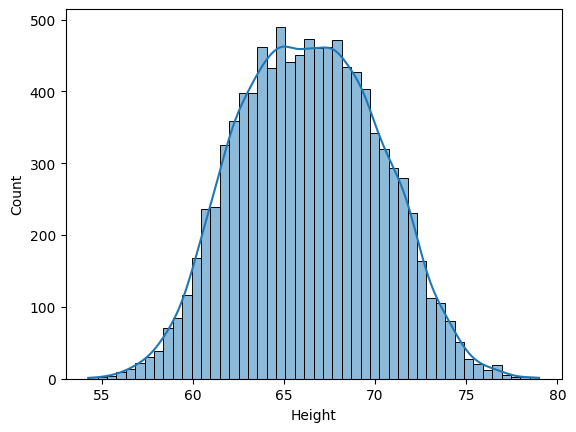

In [9]:
# Plot the distribution of height
sns.histplot(df, x = 'Height', kde = True)
plt.show()

In [11]:
# Mean and Standard Deviation
mean = df['Height'].mean()
std = df['Height'].std()
mean,std

(66.36755975482124, 3.8475281207732293)

In [13]:
lower = mean-3*std
upper = mean+3*std
lower, upper

(54.82497539250156, 77.91014411714093)

In [20]:
df[(df['Height'] < lower) | (df['Height'] > upper)]['Gender'].value_counts()

Gender
Male      5
Female    2
Name: count, dtype: int64

In [22]:
df_no_outlier = df[(df['Height'] > lower) & (df['Height'] < upper)]
df_no_outlier.shape

(9993, 2)

In [26]:
# Add a Z-score column
df['zscore'] = (df['Height']-df['Height'].mean())/df['Height'].std()

In [71]:
# Remove outliers using zscore
df[(df['zscore'] < -3) |( df['zscore'] > 3)]

Gender     Height    zscore
994     Male  78.095867  3.048271
1317    Male  78.462053  3.143445
2014    Male  78.998742  3.282934
3285    Male  78.528210  3.160640
3757    Male  78.621374  3.184854
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027

### Using IQR

In [77]:
import numpy as np
quartile1, quartile3 = np.percentile(df['Height'], [25,75])

In [78]:
quartile1,quartile3

(63.505620481218955, 69.1742617268347)

In [79]:
#Find IQR
iqr = quartile3-quartile1
iqr

5.668641245615746

In [82]:
lower_bound = quartile1 - (iqr*1.5)
upper_bound = quartile3 + (iqr*1.5)
lower_bound, upper_bound

(55.00265861279534, 77.67722359525831)

In [85]:
outliers = df[(df['Height']<lower_bound) | (df['Height']>upper_bound)]
outliers

Gender     Height    zscore
994     Male  78.095867  3.048271
1317    Male  78.462053  3.143445
2014    Male  78.998742  3.282934
3285    Male  78.528210  3.160640
3757    Male  78.621374  3.184854
6624  Female  54.616858 -3.054091
7294  Female  54.873728 -2.987329
9285  Female  54.263133 -3.146027

In [68]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
import numpy as np



In [69]:
outliers = []
def outlier_detection(data):
    threshold = 3
    mean = np.mean(data)
    std =np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [70]:
outlier_detection(dataset)

[102, 107, 108]